In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
%cd /content/drive/MyDrive/Mini project/Project

/content/drive/MyDrive/Mini project/Project


In [ ]:
data = pd.read_csv('Train_Loan_Home.csv')

1. Kiểm tra thông tin cơ bản của bộ dữ liệu

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.shape

(614, 13)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data[data['Loan_Status'] == 'Y']['Loan_Status'].count() / data['Loan_Status'].count()

0.6872964169381107

Nhận thấy rằng bộ dữ liệu có khá nhiều missing data. Có outliers ở cột Appliant Income và Coappliant Income

2. Tiền xử lý dữ liệu

a. Xử lý dữ liệu category

In [ ]:
# Bỏ LoanID khỏi bộ dữ liệu vì chỉ đóng vai trò index
data.drop('Loan_ID', axis= 1, inplace = True)

In [ ]:
data_pre = data.copy()
data_pre

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Kiểm tra các feature dữ liệu dạng category
cat_col = []
for col in data_pre.columns:
  if data_pre[col].dtypes == 'object':
    cat_col.append(col)
for col in cat_col:
  print(col, data_pre[col].unique())

Gender ['Male' 'Female' nan]
Married ['No' 'Yes' nan]
Dependents ['0' '1' '2' '3+' nan]
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes' nan]
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [ ]:
# Đổi cột Loan status thành dạng số, Y = 1, N = 0
data_pre['Loan_Status'] = np.where(data_pre['Loan_Status'] == 'Y', 1, 0)

In [ ]:
# Bỏ loan_status khỏi cat_col vì loan_status là kết quả dự đoán
cat_col.remove('Loan_Status')

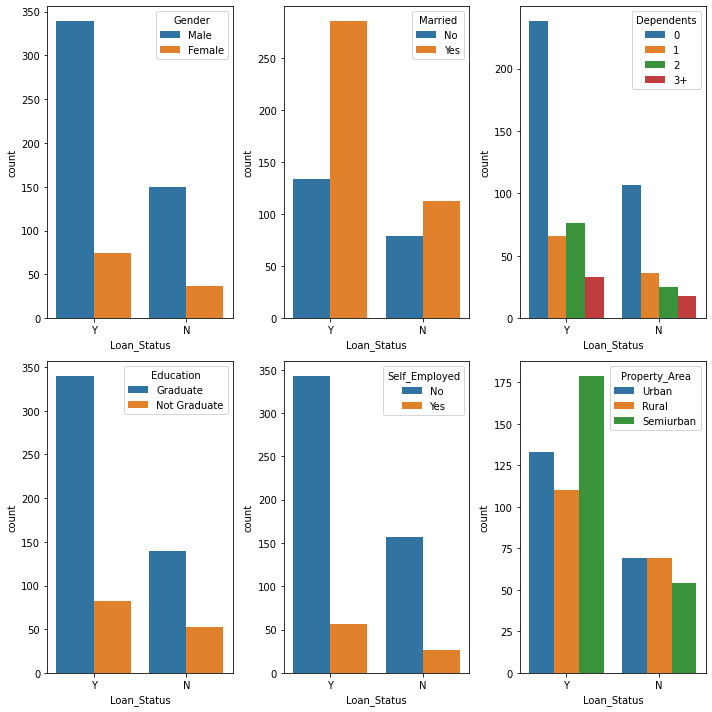

In [ ]:
# Xem tương quan giữa các cột cat và loan_status
fig, axes = plt.subplots(2, 3, figsize= (10, 10))
axes = axes.flatten()
for ax, col in zip(axes, cat_col):
  sns.countplot(x= data['Loan_Status'], hue= data[col], ax= ax)
plt.tight_layout()  
plt.savefig('/content/drive/MyDrive/Mini project/Project')

In [ ]:
# Nhận thấy các features trên không ảnh hưởng nhiều lắm đến quyết định duyệt vay, do tỷ lệ tăng ở mỗi feature cũng gần tương đương với tỷ lệ tăng của samples. Đổi về dạng số và fillna với mode.
# Có thể check lại bằng bảng corr và important features sau.
# Gender
data_pre['Gender'].fillna('Male')
data_pre['Gender'] = np.where(data_pre['Gender'] == 'Male', 1, 0)
# Married
data_pre['Married'].fillna('Yes')
data_pre['Married'] = np.where(data_pre['Married'] == 'Yes', 1, 0)
# Dependents: nhận thấy dependant từ 1 trở lên không có nhiều ảnh hưởng, chủ yếu phân loại là có và không có dependants => biến đổi thành có và không
data_pre['Dependents'].fillna('0')
data_pre['Dependents'] = np.where(data_pre['Dependents'] == '0', 0, 1)
# Education
data_pre['Education'] = np.where(data_pre['Education'] == 'Graduate', 1, 0)
# Self_Employed
data_pre['Self_Employed'].fillna('No')
data_pre['Self_Employed'] = np.where(data_pre['Self_Employed'] == 'No', 0, 1)

In [ ]:
# Riêng feature property area, nhận thấy 3 options này có thể có ảnh hưởng tới loan approval, giữ lại cả 3 cái:
def condition(x):
  if x == 'Urban':
    return 1
  elif x == 'Semiurban':
    return 10
  else:
    return 100
func = np.vectorize(condition)
data_pre['Property_Area'] = func(data_pre['Property_Area'])

In [ ]:
# Kiểm tra lại dataset
data_pre.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,100,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [ ]:
data_pre.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data_pre.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.796417,0.648208,0.438111,0.781759,0.185668,5403.459283,1621.245798,146.412162,342.00000,0.842199,33.276873,0.687296
std,0.402991,0.477919,0.496559,0.413389,0.389155,6109.041673,2926.248369,85.587325,65.12041,0.364878,43.002882,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,10.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,100.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,100.000000,1.000000


b. Xử lý các cột dữ liệu còn lại

In [ ]:
data_pre2 = data_pre.copy()

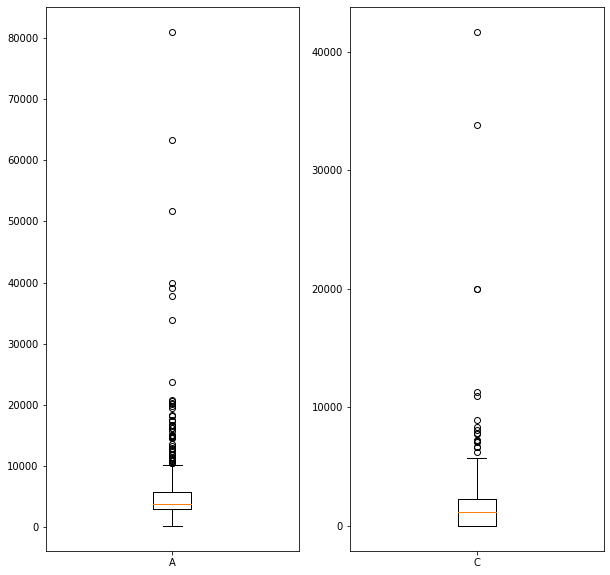

In [ ]:
# Xử lý outliers ở 2 cột income
# Vẽ boxplot để xem outlier
fig, ax = plt.subplots(1, 2, figsize= (10, 10))
ax[0].boxplot(data_pre2['ApplicantIncome'])
ax[1].boxplot(data_pre2['CoapplicantIncome'])
ax[0].set_xticklabels('ApplicantIncome')
ax[1].set_xticklabels('CoapplicantIncome')
plt.savefig('4.png')

In [ ]:
# Xem outliers ở cột app income
data_pre[data_pre2['ApplicantIncome'] > 30000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,1,1,1,1,0,39999,0.0,600.0,180.0,0.0,10,1
171,0,1,1,1,0,51763,0.0,700.0,300.0,1.0,1,1
183,1,1,1,1,0,33846,0.0,260.0,360.0,1.0,10,0
185,1,1,0,1,1,39147,4750.0,120.0,360.0,1.0,10,1
333,1,1,0,1,1,63337,0.0,490.0,180.0,1.0,1,1
409,1,1,1,1,0,81000,0.0,360.0,360.0,0.0,100,0
443,1,0,1,1,0,37719,0.0,152.0,360.0,1.0,10,1


In [ ]:
# Các outlier ngoài số 409 có vẻ không sai do income lớn nên vẫn được duyệt vay bình thường. Kiểm tra outlier 409 bằng cách so sánh với cùng điều kiện LoanAmount và Loan_Amount_Term
data_pre2[(data_pre2['Loan_Amount_Term'] == 360) & (data_pre2['LoanAmount'] >= 360) & (data_pre2['Loan_Status'] == 1)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
126,0,1,1,1,0,23803,0.0,370.0,360.0,1.0,100,1
278,1,1,0,1,0,14583,0.0,436.0,360.0,1.0,10,1
432,1,0,0,1,1,12876,0.0,405.0,360.0,1.0,10,1
506,1,1,0,1,0,20833,6667.0,480.0,360.0,NaN,1,1
523,1,1,1,1,1,7948,7166.0,480.0,360.0,1.0,100,1
525,1,1,1,1,1,17500,0.0,400.0,360.0,1.0,100,1
561,0,1,1,1,1,19484,0.0,600.0,360.0,1.0,10,1
604,0,1,1,1,0,12000,0.0,496.0,360.0,1.0,10,1


In [ ]:
# Nhận thấy rằng với cùng điều kiện vay, thậm chí ưu đãi hơn (LoanAmount lớn hơn), các applicant có income nhỏ hơn vẫn được duyệt vay => outlier 81000 có thể do dữ liệu sai
# => remove
data_pre2.drop(409, inplace= True)
data_pre2.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,1,1
1,1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,100,0
2,2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,100,1
609,610,1,1,1,1,0,4106,0.0,40.0,180.0,1.0,100,1
610,611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
611,612,1,1,1,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [ ]:
# Xem outliers ở cột Coapp income
data_pre2[data_pre2['CoapplicantIncome'] > 10000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,10,0
177,1,1,1,1,0,5516,11300.0,495.0,360.0,0.0,10,0
402,1,0,0,1,0,2500,20000.0,103.0,360.0,1.0,10,1
417,1,1,1,1,1,1600,20000.0,239.0,360.0,1.0,1,0
581,1,0,0,1,0,1836,33837.0,90.0,360.0,1.0,1,0
600,0,0,1,1,1,416,41667.0,350.0,180.0,NaN,1,0


In [ ]:
# Thử so sánh với các Coapp từ 5k đến 10k và được duyệt vay
data_pre2[(data_pre2['CoapplicantIncome'] > 5000) & (data_pre2['Loan_Status'] == 1) & (data_pre2['CoapplicantIncome'] < 10000)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
12,1,1,1,1,0,3073,8106.0,200.0,360.0,1.0,1,1
21,1,1,1,1,0,5955,5625.0,315.0,360.0,1.0,1,1
38,1,0,0,1,0,4166,7210.0,184.0,360.0,1.0,1,1
91,1,1,1,1,0,6250,5654.0,188.0,180.0,1.0,10,1
122,0,0,0,1,0,2137,8980.0,137.0,360.0,0.0,10,1
159,1,1,0,1,0,4583,5625.0,255.0,360.0,1.0,10,1
173,1,1,0,1,0,5708,5625.0,187.0,360.0,1.0,10,1
188,0,1,0,1,1,674,5296.0,168.0,360.0,1.0,100,1
242,1,0,0,1,0,2965,5701.0,155.0,60.0,1.0,1,1
253,1,1,1,0,0,2661,7101.0,279.0,180.0,1.0,10,1


In [ ]:
# Không có đủ cơ sở để đánh giá, tạm biến đổi hết về mean
data_pre2['CoapplicantIncome'] = np.where(data_pre2['CoapplicantIncome'] > 10000, (data_pre2['CoapplicantIncome'].mean()), data_pre2['CoapplicantIncome'])

In [ ]:
# Fillna với mean vào 2 cột LoanAmt và LoanAmtTerm
data_pre2['LoanAmount'] = data_pre2['LoanAmount'].fillna(data_pre2['LoanAmount'].mean())
data_pre2['Loan_Amount_Term'] = data_pre2['Loan_Amount_Term'].fillna(data_pre2['Loan_Amount_Term'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


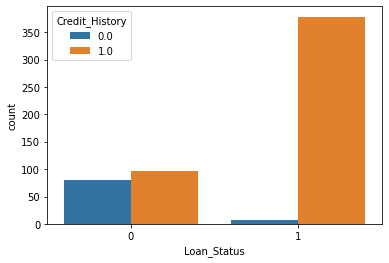

In [ ]:
# Qua việc so sánh các dữ liệu ở trên, nhận thấy các hồ sơ được duyệt vay thường có credit_history, kiểm tra lại cho chính xác
sns.countplot(data_pre2['Loan_Status'], hue= data_pre2['Credit_History'])
plt.savefig('7.png')

In [ ]:
# Nhận thấy hầu hết các hồ sơ được duyệt vay đều có Credit_history => loại bỏ các null sẽ cho dataset khách quan nhất, tuy nhiên số lượng null ở cột này lớn (50 so với tổng 613 dữ liệu)
# => Fillna với mode
data_pre2['Credit_History'] = data_pre2['Credit_History'].fillna(1)

In [ ]:
# Tạo thêm 1 feature mới để đánh giá là chỉ số income/loan amount
#data.insert(10, 'IncomeRatio',(data['ApplicantIncome'] + data['CoapplicantIncome']) / data['LoanAmount'])

In [ ]:
# Kiểm tra lại dataset
data_pre2.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data_pre2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.050761,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,100,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [ ]:
data_pre2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             613 non-null    int64  
 1   Married            613 non-null    int64  
 2   Dependents         613 non-null    int64  
 3   Education          613 non-null    int64  
 4   Self_Employed      613 non-null    int64  
 5   ApplicantIncome    613 non-null    int64  
 6   CoapplicantIncome  613 non-null    float64
 7   LoanAmount         613 non-null    float64
 8   Loan_Amount_Term   613 non-null    float64
 9   Credit_History     613 non-null    float64
 10  Property_Area      613 non-null    int64  
 11  Loan_Status        613 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 82.3 KB


c. Có bộ dữ liệu hoành chỉnh, kiểm tra các features nào quan trọng

c1. Bảng corr

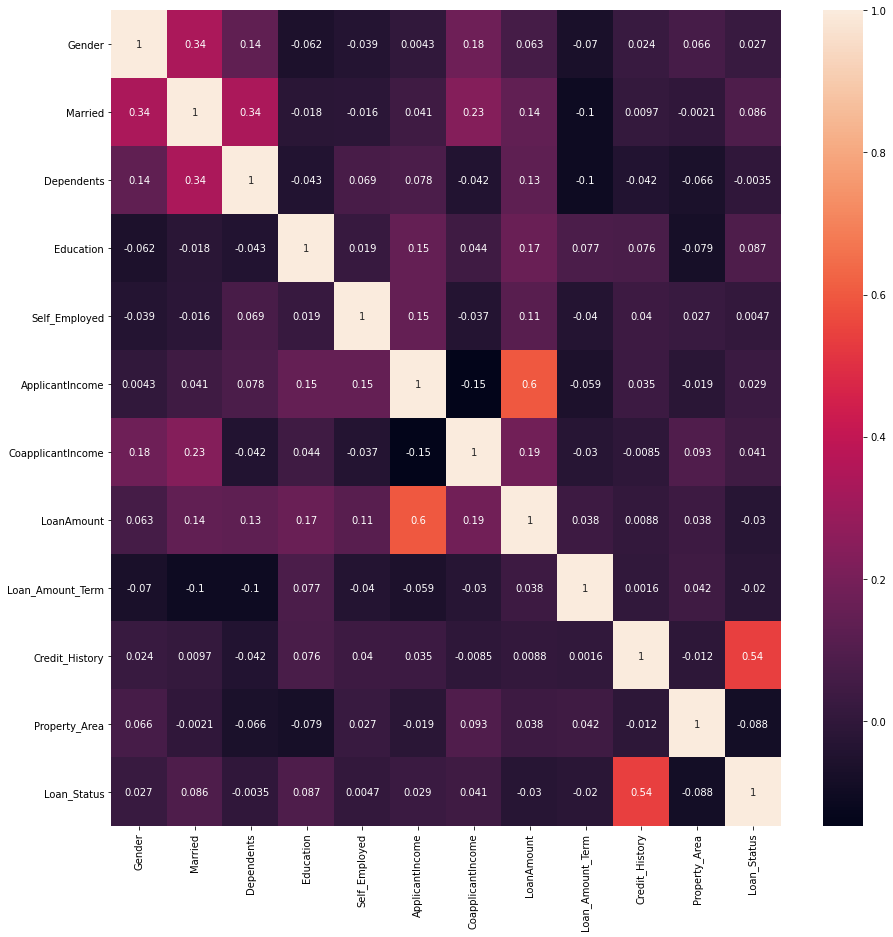

In [ ]:
corrmap = data_pre2.corr()
plt.figure(figsize= (15, 15))
sns.heatmap(corrmap, annot= True)
plt.savefig('10.png')
# nhận thấy Credit history có liên quan nhiều nhất tới kết quả. Top 4 features: Credit_History, Property_Area, Education, Married

c2. Dùng selectKbest để tìm feature quan trọng

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
Xf = data_pre2.iloc[:,:-1]
yf = data_pre2.iloc[:,-1]

In [ ]:
best_features = SelectKBest(score_func= chi2, k= 10)
features = best_features.fit(Xf, yf)
fscores = pd.DataFrame(features.scores_)
fcolumns = pd.DataFrame(Xf.columns)
topfeatures = pd.concat([fcolumns, fscores], axis= 1)
topfeatures.columns = ['Features', 'Score']
print(topfeatures)
# nhận thấy có 5 features ảnh hưởng lớn tới kết quả: ApplicantIncome, CoapplicantIncome, Property_Area, LoanAmount, Credit_History

             Features        Score
0              Gender     0.088998
1             Married     1.607027
2          Dependents     0.004278
3           Education     1.022150
4       Self_Employed     0.011075
5     ApplicantIncome  2770.705317
6   CoapplicantIncome  2019.700197
7          LoanAmount    27.134407
8    Loan_Amount_Term     3.070315
9      Credit_History    25.493732
10      Property_Area   264.440755


c3. Dùng Decision Tree để xem features nào quan trọng

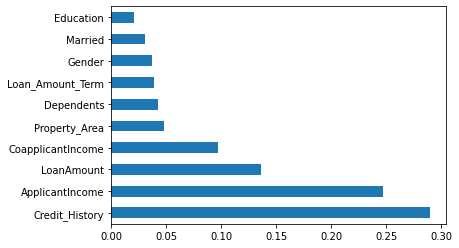

In [ ]:
model = DecisionTreeClassifier()
model.fit(Xf, yf)
importantfeat = pd.Series(model.feature_importances_, index= Xf.columns)
importantfeat.nlargest(10).plot(kind= 'barh')
plt.savefig('12.png')
# Nhận thấy có 5 features ảnh hưởng lớn tới kết quả: Credit_History, ApplicantIncome, LoanAmount, Coapplicantincome, Gender

Chọn 5 feature Credit_History, ApplicantIncome, CoapplicantIncome, LoanAmount và Property_Area do có điểm cao ở tối thiểu 2/3 test.

In [ ]:
X = data_pre2[['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Property_Area']]
y = data_pre2.iloc[:, -1]

3. ML model

a. Tạo tệp train và val

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, recall_score, accuracy_score, precision_score, confusion_matrix

In [ ]:
# Tạo set data train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [ ]:
X_train.shape, X_val.shape

((429, 5), (184, 5))

In [ ]:
# Kiểm tra lại tỉ lệ mỗi gói dữ liệu train và val
y.value_counts().values/ len(y)

array([0.68841762, 0.31158238])

In [ ]:
y_train.value_counts().values/ len(y_train)

array([0.70862471, 0.29137529])

In [ ]:
y_val.value_counts().values/ len(y_val)

array([0.64130435, 0.35869565])

In [ ]:
scaler = StandardScaler().fit(X_train)
scaledX = scaler.transform(X_train)

In [ ]:
scaler1 = StandardScaler().fit(X_val)
scaledXval = scaler1.transform(X_val)

b. Tính điểm accuracy trước

In [ ]:
# Xem xét điểm accuracy trước sau đó sẽ tối ưu điểm precision sau (cần precision cao để hạn chế rủi ro mất vốn)
nfolds = 10
seed = 42
scoring = 'accuracy'

In [ ]:
models = []
models.append(('LogReg', LogisticRegression()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))

In [ ]:
results = []
names = []
for name, model in models:
  skfold = StratifiedKFold(n_splits= nfolds, random_state= seed)
  cv_results = cross_val_score(model, X_train, y_train, cv= skfold, scoring= scoring)
  results.append(cv_results)
  names.append(name)
  prt = '%s: %f' % (name, cv_results.mean())
  print(prt)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LogReg: 0.797231
KNC: 0.676080
DTC: 0.731894


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


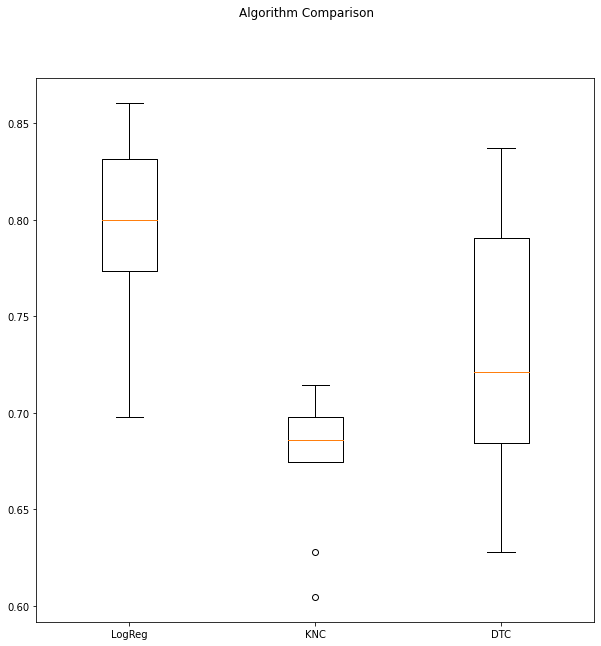

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('13.png')

In [ ]:
# Scale lại dữ liệu
pipelines = []
pipelines.append(('ScaledLogReg', Pipeline([('Scaler', StandardScaler()),('LogReg',LogisticRegression())])))
pipelines.append(('ScaledKNC', Pipeline([('Scaler', StandardScaler()),('KNC',KNeighborsClassifier())])))
pipelines.append(('ScaledDTC', Pipeline([('Scaler', StandardScaler()),('DTC',DecisionTreeClassifier())])))

In [ ]:
results = []
names = []
for name, model in pipelines:
  skfold = StratifiedKFold(n_splits= nfolds, random_state= seed)
  cv_results = cross_val_score(model, X_train, y_train, cv= skfold, scoring= scoring)
  results.append(cv_results)
  names.append(name)
  prt = '%s: %f' % (name, cv_results.mean())
  print(prt)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLogReg: 0.827464
ScaledKNC: 0.825138
ScaledDTC: 0.746013


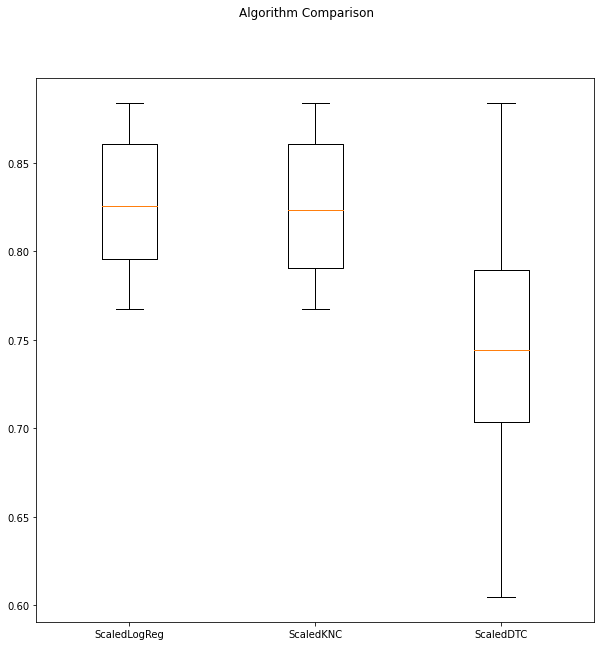

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('13.png')

LogReg và KNC cho điểm khá tương đồng, kiểm tra precision:

In [ ]:
results = []
names = []
for name, model in pipelines:
  skfold = StratifiedKFold(n_splits= nfolds, random_state= seed)
  cv_results = cross_val_score(model, X_train, y_train, cv= skfold, scoring= 'precision')
  results.append(cv_results)
  names.append(name)
  prt = '%s: %f' % (name, cv_results.mean())
  print(prt)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLogReg: 0.814193
ScaledKNC: 0.833505
ScaledDTC: 0.805417


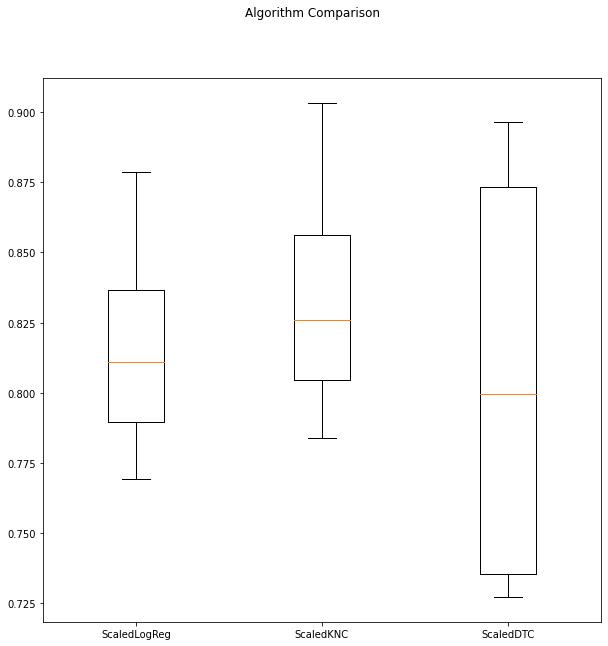

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('14.png')

Điểm accuracy và precision ở KNC cao nhất, lựa chọn model này để tối ưu.

In [ ]:
model = KNeighborsClassifier()
neighbors = np.arange(1, 15, 2)
metrics = ['euclidean', 'manhattan']
grid = dict(n_neighbors= neighbors, metric= metrics)
skfold= StratifiedKFold(n_splits= 10)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv= skfold, scoring= 'precision')

In [ ]:
grid_result = grid_search.fit(scaledX, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.837270 using {'metric': 'euclidean', 'n_neighbors': 3}
0.819889 (0.043008) with: {'metric': 'euclidean', 'n_neighbors': 1}
0.837270 (0.040279) with: {'metric': 'euclidean', 'n_neighbors': 3}
0.833824 (0.041092) with: {'metric': 'euclidean', 'n_neighbors': 5}
0.833949 (0.041607) with: {'metric': 'euclidean', 'n_neighbors': 7}
0.825734 (0.039275) with: {'metric': 'euclidean', 'n_neighbors': 9}
0.814597 (0.033038) with: {'metric': 'euclidean', 'n_neighbors': 11}
0.812535 (0.035453) with: {'metric': 'euclidean', 'n_neighbors': 13}
0.818287 (0.037467) with: {'metric': 'manhattan', 'n_neighbors': 1}
0.829287 (0.040146) with: {'metric': 'manhattan', 'n_neighbors': 3}
0.832522 (0.036613) with: {'metric': 'manhattan', 'n_neighbors': 5}
0.829334 (0.042985) with: {'metric': 'manhattan', 'n_neighbors': 7}
0.820832 (0.034694) with: {'metric': 'manhattan', 'n_neighbors': 9}
0.812535 (0.035453) with: {'metric': 'manhattan', 'n_neighbors': 11}
0.812535 (0.035453) with: {'metric': 'manhattan', 

Chọn được model: KNC, euclidean, 3:

In [ ]:
model = KNeighborsClassifier(n_neighbors= 3, metric= 'euclidean')

In [ ]:
model.fit(scaledX, y_train)
y_pred = model.predict(scaledXval)
precision_score(y_val, y_pred)

0.7412587412587412

In [ ]:
accuracy_score(y_val, y_pred)

0.7336956521739131

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

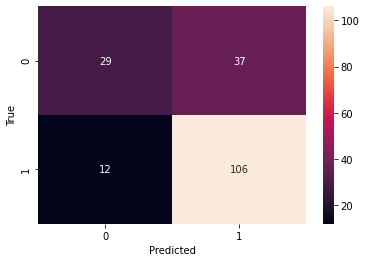

In [ ]:
sns.heatmap(confusion_matrix(y_val,y_pred),annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('15.png')

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.44      0.54        66
           1       0.74      0.90      0.81       118

    accuracy                           0.73       184
   macro avg       0.72      0.67      0.68       184
weighted avg       0.73      0.73      0.72       184



DONE

c. Tính điểm accuracy trước

In [ ]:
nfolds = 10
seed = 42
scoring1 = 'precision'

In [ ]:
models1 = []
models1.append(('LogReg', LogisticRegression()))
models1.append(('KNC', KNeighborsClassifier()))
models1.append(('DTC', DecisionTreeClassifier()))

In [ ]:
results1 = []
names1 = []
for name, model in models1:
  skfold1 = StratifiedKFold(n_splits= nfolds, random_state= seed)
  cv_results1 = cross_val_score(model, X_train, y_train, cv= skfold1, scoring= scoring1)
  results1.append(cv_results1)
  names1.append(name)
  prt = '%s: %f' % (name, cv_results1.mean())
  print(prt)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LogReg: 0.789125
KNC: 0.722819
DTC: 0.806560


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


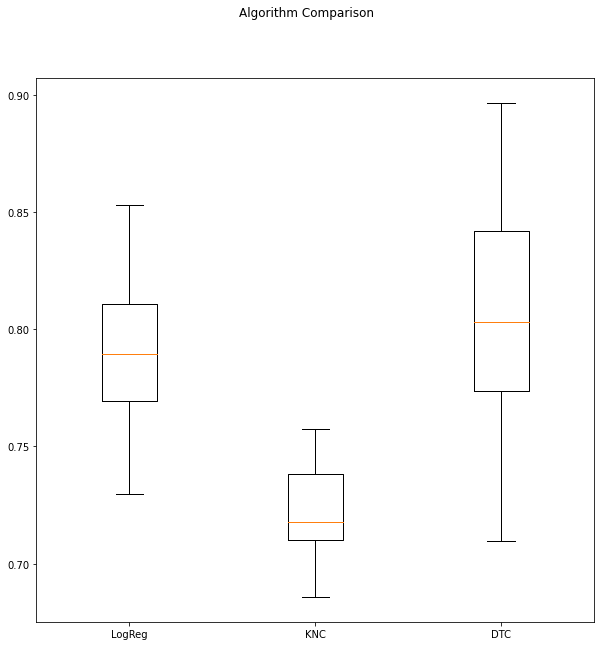

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

Thử scale lại dữ liệu

In [ ]:
pipelines1 = []
pipelines1.append(('ScaledLogReg', Pipeline([('Scaler', StandardScaler()),('LogReg',LogisticRegression())])))
pipelines1.append(('ScaledKNC', Pipeline([('Scaler', StandardScaler()),('KNC',KNeighborsClassifier())])))
pipelines1.append(('ScaledDTC', Pipeline([('Scaler', StandardScaler()),('DTC',DecisionTreeClassifier())])))

In [ ]:
results1 = []
names1 = []
for name, model in pipelines1:
  skfold1 = StratifiedKFold(n_splits= nfolds, random_state= seed)
  cv_results1 = cross_val_score(model, X_train, y_train, cv= skfold, scoring= scoring1)
  results1.append(cv_results1)
  names1.append(name)
  prt = '%s: %f' % (name, cv_results1.mean())
  print(prt)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLogReg: 0.814193
ScaledKNC: 0.833505
ScaledDTC: 0.815690


Điểm KNC vẫn cao nhất => Done.

4. Thử chạy full dự liệu, không lọc features quan trọng:

In [ ]:
X2 = data_pre2.iloc[:, :-1]
y2 = data_pre2.iloc[:, -1]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size= 0.3, random_state= 42)

In [ ]:
X2_train.shape, X2_test.shape

((429, 11), (184, 11))

In [ ]:
nfolds = 10
seed = 42
scoring1 = 'precision'

In [ ]:
models2 = []
models2.append(('LogReg', LogisticRegression()))
models2.append(('KNC', KNeighborsClassifier()))
models2.append(('DTC', DecisionTreeClassifier()))

In [ ]:
results2 = []
names2 = []
for name, model in models2:
  skfold2 = StratifiedKFold(n_splits= nfolds, random_state= seed)
  cv_results2 = cross_val_score(model, X2_train, y2_train, cv= skfold2, scoring= scoring1)
  results2.append(cv_results2)
  names2.append(name)
  prt = '%s: %f' % (name, cv_results2.mean())
  print(prt)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LogReg: 0.813586
KNC: 0.715177
DTC: 0.793983


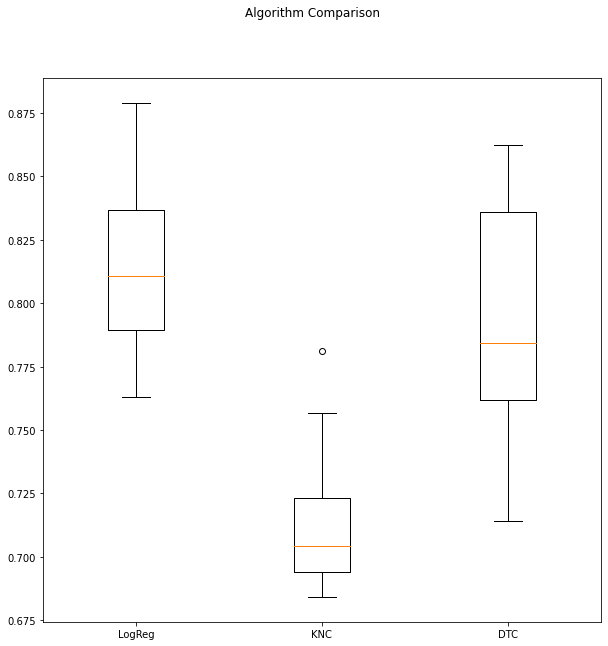

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

In [ ]:
# Thử scale lại dữ liệu
pipelines2 = []
pipelines2.append(('ScaledLogReg', Pipeline([('Scaler', StandardScaler()),('LogReg',LogisticRegression())])))
pipelines2.append(('ScaledKNC', Pipeline([('Scaler', StandardScaler()),('KNC',KNeighborsClassifier())])))
pipelines2.append(('ScaledDTC', Pipeline([('Scaler', StandardScaler()),('DTC',DecisionTreeClassifier())])))

In [ ]:
results2 = []
names2 = []
for name, model in pipelines2:
  skfold2 = StratifiedKFold(n_splits= nfolds, random_state= seed)
  cv_results2 = cross_val_score(model, X2_train, y2_train, cv= skfold2, scoring= scoring1)
  results2.append(cv_results2)
  names2.append(name)
  prt = '%s: %f' % (name, cv_results2.mean())
  print(prt)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLogReg: 0.813586
ScaledKNC: 0.810114
ScaledDTC: 0.790569


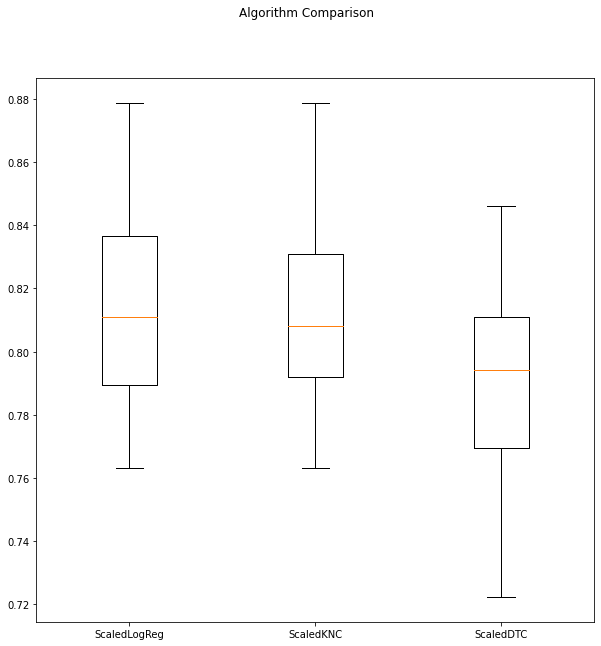

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.savefig('17.png')

In [ ]:
#LogReg và KNC cho điểm khá tương đồng, thử điểm accuracy:
pipelines2 = []
pipelines2.append(('ScaledLogReg', Pipeline([('Scaler', StandardScaler()),('LogReg',LogisticRegression())])))
pipelines2.append(('ScaledKNC', Pipeline([('Scaler', StandardScaler()),('KNC',KNeighborsClassifier())])))

In [ ]:
results2 = []
names2 = []
for name, model in pipelines2:
  skfold2 = StratifiedKFold(n_splits= nfolds, random_state= seed)
  cv_results2 = cross_val_score(model, X2_train, y2_train, cv= skfold2, scoring= 'accuracy')
  results2.append(cv_results2)
  names2.append(name)
  prt = '%s: %f' % (name, cv_results2.mean())
  print(prt)

ScaledLogReg: 0.825138
ScaledKNC: 0.811185


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


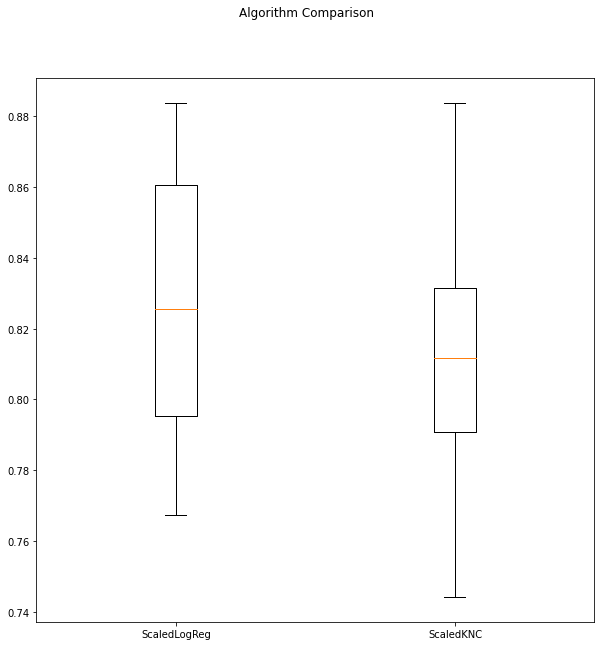

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

In [ ]:
# chọn logreg để tối ưu (LogReg dù có scale dữ liệu hay không thì điểm vẫn không đổi, không scale lại dữ liệu):
model = LogisticRegression()
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_iter = list(range(100,500,100))
solver = ['newton-cg', 'lbfgs', 'liblinear']
param_grid = dict(C= C, solver= solver, max_iter= max_iter)

In [ ]:
skfold2= StratifiedKFold(n_splits= 10)
grid_search2 = GridSearchCV(estimator=model, param_grid=param_grid, cv= skfold, scoring= 'precision')

In [ ]:
grid_result2 = grid_search2.fit(X2_train, y2_train)
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linese

Best: 0.815013 using {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
0.708638 (0.011123) with: {'C': 0.001, 'max_iter': 100, 'solver': 'newton-cg'}
0.707941 (0.010965) with: {'C': 0.001, 'max_iter': 100, 'solver': 'lbfgs'}
0.707941 (0.010965) with: {'C': 0.001, 'max_iter': 100, 'solver': 'liblinear'}
0.708638 (0.011123) with: {'C': 0.001, 'max_iter': 200, 'solver': 'newton-cg'}
0.707941 (0.010965) with: {'C': 0.001, 'max_iter': 200, 'solver': 'lbfgs'}
0.707941 (0.010965) with: {'C': 0.001, 'max_iter': 200, 'solver': 'liblinear'}
0.708638 (0.011123) with: {'C': 0.001, 'max_iter': 300, 'solver': 'newton-cg'}
0.707941 (0.010965) with: {'C': 0.001, 'max_iter': 300, 'solver': 'lbfgs'}
0.707941 (0.010965) with: {'C': 0.001, 'max_iter': 300, 'solver': 'liblinear'}
0.708638 (0.011123) with: {'C': 0.001, 'max_iter': 400, 'solver': 'newton-cg'}
0.707941 (0.010965) with: {'C': 0.001, 'max_iter': 400, 'solver': 'lbfgs'}
0.707941 (0.010965) with: {'C': 0.001, 'max_iter': 400, 'solver': 'liblinear'}
0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model = LogisticRegression(C= 10, max_iter= 100, solver= 'lbfgs')
model.fit(X2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y2_pred = model.predict(X2_test)

In [ ]:
precision_score(y2_test, y2_pred)

0.7388535031847133

In [ ]:
accuracy_score(y2_test, y2_pred)

0.7663043478260869

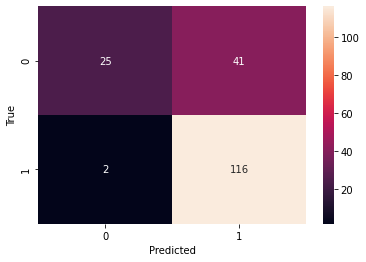

In [ ]:
sns.heatmap(confusion_matrix(y2_test,y2_pred),annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('18.png')

In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.93      0.38      0.54        66
           1       0.74      0.98      0.84       118

    accuracy                           0.77       184
   macro avg       0.83      0.68      0.69       184
weighted avg       0.81      0.77      0.73       184



Thử tune threshold

In [ ]:
def modelprediction(proba, threshold):
  return np.array([1 if x > threshold else 0 for x in proba[:, 1]])

In [ ]:
thr = np.arange(0.1, 1, 0.05)

In [ ]:
for i in thr:
  y2a_pred = modelprediction(model.predict_proba(X2_test), i)
  score1 = accuracy_score(y2_test, y2a_pred)
  score2 = precision_score(y2_test, y2a_pred)
  print('With threshold =', i, ',', 'accuracy score is:', score1, 'precision score is:', score2)

With threshold = 0.1 , accuracy score is: 0.6413043478260869 precision score is: 0.6413043478260869
With threshold = 0.15000000000000002 , accuracy score is: 0.6739130434782609 precision score is: 0.6629213483146067
With threshold = 0.20000000000000004 , accuracy score is: 0.7119565217391305 precision score is: 0.6900584795321637
With threshold = 0.25000000000000006 , accuracy score is: 0.7119565217391305 precision score is: 0.6900584795321637
With threshold = 0.30000000000000004 , accuracy score is: 0.7282608695652174 precision score is: 0.7048192771084337
With threshold = 0.3500000000000001 , accuracy score is: 0.7608695652173914 precision score is: 0.7341772151898734
With threshold = 0.40000000000000013 , accuracy score is: 0.7663043478260869 precision score is: 0.7388535031847133
With threshold = 0.45000000000000007 , accuracy score is: 0.7663043478260869 precision score is: 0.7388535031847133
With threshold = 0.5000000000000001 , accuracy score is: 0.7663043478260869 precision sco

In [ ]:
y2a_pred = modelprediction(model.predict_proba(X2_test), 0.65)

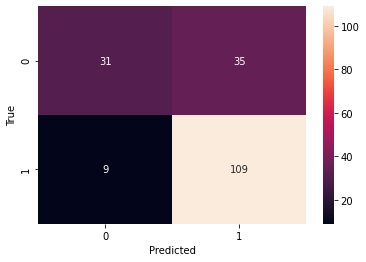

In [ ]:
sns.heatmap(confusion_matrix(y2_test,y2a_pred),annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('20.png')

In [ ]:
print(classification_report(y2_test, y2a_pred))

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        66
           1       0.76      0.92      0.83       118

    accuracy                           0.76       184
   macro avg       0.77      0.70      0.71       184
weighted avg       0.76      0.76      0.74       184

